In [68]:
import cupy
import numpy as np
import skfuzzy as fuzz
import torch
import matplotlib.pyplot as plt

# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)

x_headlight = np.arange(0, 11, 1)
x_windshield = np.arange(0, 11, 1)
x_wheel = np.arange(0, 11, 1)
x_breaklight = np.arange(0,11,1)
x_rearview = np.arange(0,11,1)

y_car = np.arange(0,11,1)



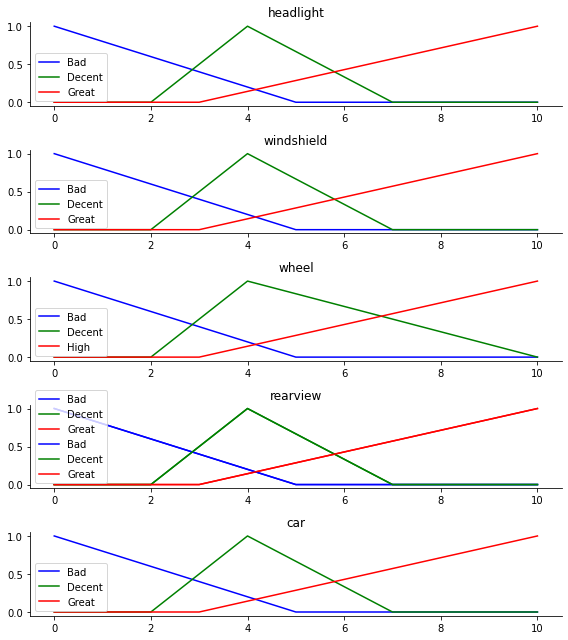

In [69]:

# Generate fuzzy membership functions
headlight_lo = fuzz.trimf(x_headlight, [0, 0, 5])
headlight_md = fuzz.trimf(x_headlight, [2, 4, 7])
headlight_hi = fuzz.trimf(x_headlight, [3, 10, 10])

windshield_lo = fuzz.trimf(x_windshield, [0, 0, 5])
windshield_md = fuzz.trimf(x_windshield, [2, 4, 7])
windshield_hi = fuzz.trimf(x_windshield, [3, 10, 10])

wheel_lo = fuzz.trimf(x_wheel, [0, 0, 5])
wheel_md = fuzz.trimf(x_wheel, [2, 4, 10])
wheel_hi = fuzz.trimf(x_wheel, [3, 10, 10])

breaklight_lo = fuzz.trimf(x_breaklight, [0, 0, 5])
breaklight_md = fuzz.trimf(x_breaklight, [2, 4, 7])
breaklight_hi = fuzz.trimf(x_breaklight, [3, 10, 10])

rearview_lo = fuzz.trimf(x_rearview, [0, 0, 5])
rearview_md = fuzz.trimf(x_rearview, [2, 4, 7])
rearview_hi = fuzz.trimf(x_rearview, [3, 10, 10])

car_lo = fuzz.trimf(y_car, [0, 0, 5])
car_md = fuzz.trimf(y_car, [2, 4, 7])
car_hi = fuzz.trimf(y_car, [3, 10, 10])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=5, figsize=(8, 9))

ax0.plot(x_headlight, headlight_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_headlight, headlight_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_headlight, headlight_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('headlight')
ax0.legend()

ax1.plot(x_windshield, windshield_lo, 'b', linewidth=1.5, label='Bad')
ax1.plot(x_windshield, windshield_md, 'g', linewidth=1.5, label='Decent')
ax1.plot(x_windshield, windshield_hi, 'r', linewidth=1.5, label='Great')
ax1.set_title('windshield')
ax1.legend()

ax2.plot(x_wheel, wheel_lo, 'b', linewidth=1.5, label='Bad')
ax2.plot(x_wheel, wheel_md, 'g', linewidth=1.5, label='Decent')
ax2.plot(x_wheel, wheel_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('wheel')
ax2.legend()

ax3.plot(x_breaklight, breaklight_lo, 'b', linewidth=1.5, label='Bad')
ax3.plot(x_breaklight, breaklight_md, 'g', linewidth=1.5, label='Decent')
ax3.plot(x_breaklight, breaklight_hi, 'r', linewidth=1.5, label='Great')
ax3.set_title('breaklight')
ax3.legend()

ax3.plot(x_rearview, rearview_lo, 'b', linewidth=1.5, label='Bad')
ax3.plot(x_rearview, rearview_md, 'g', linewidth=1.5, label='Decent')
ax3.plot(x_rearview, rearview_hi, 'r', linewidth=1.5, label='Great')
ax3.set_title('rearview')
ax3.legend()

ax4.plot(y_car, car_lo, 'b', linewidth=1.5, label='Bad')
ax4.plot(y_car, car_md, 'g', linewidth=1.5, label='Decent')
ax4.plot(y_car, car_hi, 'r', linewidth=1.5, label='Great')
ax4.set_title('car')
ax4.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2, ax3, ax4):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

high: [0.         0.         0.         0.         0.14285714 0.28571429
 0.42857143 0.57142857 0.71428571 0.71428571 0.71428571]
medium: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
low: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


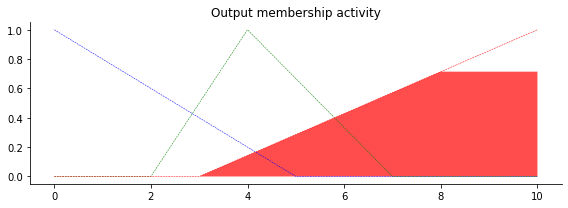

In [111]:
# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
in_headlight = torch.tensor([9])
in_windshield = torch.tensor([8])
in_rearview = torch.tensor([2])
in_breaklight = torch.tensor([0])
in_wheel = torch.tensor([7])

headlight_level_lo = fuzz.interp_membership(x_headlight, headlight_lo, in_headlight)
headlight_level_md = fuzz.interp_membership(x_headlight, headlight_md, in_headlight)
headlight_level_hi = fuzz.interp_membership(x_headlight, headlight_hi, in_headlight)

windshield_level_lo = fuzz.interp_membership(x_windshield, windshield_lo, in_windshield)
windshield_level_md = fuzz.interp_membership(x_windshield, windshield_md, in_windshield)
windshield_level_hi = fuzz.interp_membership(x_windshield, windshield_hi, in_windshield)

rearview_level_lo = fuzz.interp_membership(x_rearview, rearview_lo, in_rearview)
rearview_level_md = fuzz.interp_membership(x_rearview, rearview_md, in_rearview)
rearview_level_hi = fuzz.interp_membership(x_rearview, rearview_hi, in_rearview)

breaklight_level_lo = fuzz.interp_membership(x_breaklight, breaklight_lo, in_breaklight)
breaklight_level_md = fuzz.interp_membership(x_breaklight, breaklight_md, in_breaklight)
breaklight_level_hi = fuzz.interp_membership(x_breaklight, breaklight_hi, in_breaklight)

wheel_level_lo = fuzz.interp_membership(x_wheel, wheel_lo, in_wheel)
wheel_level_md = fuzz.interp_membership(x_wheel, wheel_md, in_wheel)
wheel_level_hi = fuzz.interp_membership(x_wheel, wheel_hi, in_wheel)

# Now we take our rules and apply them. Rule 1 concerns bad food OR service.

#IF headlights_hi and wheel_hi and breaklights_hi and 

# If if (headlights_hi OR breaklights_hi) and (windshield_hi OR rearview_hi OR wheel_hi)
active_rule1 = np.fmax(wheel_level_hi, windshield_level_hi)
active_rule1 = np.fmax(active_rule1, rearview_level_hi)
active_rule = np.fmax(headlight_level_hi,breaklight_level_hi)
active_rule1 = np.fmin(active_rule1, active_rule)
# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
car_activation_hi = np.fmin(active_rule1, car_hi)

# If if (headlights_hi OR breaklights_hi) OR (windshield_hi OR rearview_hi OR wheel_hi)
active_rule1 = np.fmax(wheel_level_hi, windshield_level_hi)
active_rule1 = np.fmax(active_rule1, rearview_level_hi)
active_rule = np.fmax(headlight_level_hi,breaklight_level_hi)
active_rule1 = np.fmax(active_rule1, active_rule)
# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
car_activation_hi2 = np.fmin(active_rule1, car_hi)  # removed entirely to 0

# If if (headlights_md OR breaklights_md) OR (windshield_md OR rearview_md OR wheel_md)
active_rule1 = np.fmax(wheel_level_hi, windshield_level_hi)
active_rule1 = np.fmax(active_rule1, rearview_level_hi)
active_rule = np.fmax(headlight_level_hi,breaklight_level_hi)
active_rule1 = np.fmax(active_rule1, active_rule)
# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
car_activation_hi3 = np.fmin(active_rule1, car_hi)

#IF headlights_lo AND breaklights_lo OR ( wheel_lo and breaklights_lo and all low)
#For rule 2 we connect acceptable service to medium tipping
active_rule2 = np.fmin(wheel_level_lo, windshield_level_lo)
active_rule2 = np.fmin(active_rule2, rearview_level_lo)
active_rule = np.fmin(headlight_level_lo,breaklight_level_lo)
active_rule2 = np.fmax(active_rule2, active_rule)
car_activation_lo = np.fmin(active_rule2, car_lo)

#MEDIUM : if headlights_md OR headlights_md AND all md
active_rule3 = np.fmax(wheel_level_md, windshield_level_md)
active_rule3 = np.fmax(active_rule3, rearview_level_md)
active_rule3 = np.fmax(active_rule3, headlight_level_md)
active_rule = np.fmax(headlight_level_md,breaklight_level_md)
active_rule3 = np.fmin(active_rule3, active_rule)

car_activation_md = np.fmin(active_rule3,car_md)

#MEDIUM : if Headlights_lo OR breaklights_lo AND (windshield md OR all md)
active_rule3 = np.fmax(wheel_level_md, windshield_level_md)
active_rule3 = np.fmax(active_rule3, rearview_level_md)
active_rule3 = np.fmin(active_rule3, headlight_level_md)
active_rule = np.fmax(headlight_level_md,breaklight_level_md)
active_rule3 = np.fmin(active_rule3, active_rule)

car_activation_md2 = np.fmin(active_rule3,car_md)
car_activation_md = np.fmin(car_activation_md,car_activation_md2)


print(f"high: {car_activation_hi}")
print(f"medium: {car_activation_md}")
print(f"low: {car_activation_lo}")
car0 = np.zeros_like(y_car)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(y_car, car0, car_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(y_car, car_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(y_car, car0, car_activation_md, facecolor='g', alpha=0.7)
ax0.plot(y_car, car_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(y_car, car0, car_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(y_car, car_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.1429, 0.2857, 0.4286, 0.5714, 0.7143,
        0.8571, 0.8571], dtype=torch.float64)
car == 10


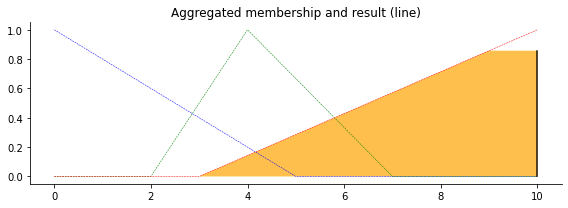

In [113]:
# Aggregate all three output membership functions together
aggregated = np.fmax(np.fmax(np.fmax(car_activation_lo,
                        np.fmax(car_activation_md, car_activation_hi)),
                            car_activation_hi2),car_activation_hi3)

# Calculate defuzzified result
car = fuzz.defuzz(y_car, aggregated, 'lom')
aggregated = torch.from_numpy(aggregated)
print(aggregated)
car_activation = fuzz.interp_membership(y_car, aggregated, car)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(y_car, car_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(y_car, car_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(y_car, car_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(y_car, car0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([car, car], [0, car_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
print(f"car == {car}")

In [12]:
import torch
###########Added#############
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        print("CUDA available ! default device set to GPU!")
        return torch.device('cuda')
    else:
        print("ERROR : CUDA device unavailable running on CPU...")
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""   
    if isinstance(data, (list,tuple)):
        return [self.to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)
###########Added#############

C:\Users\kheli\AppData\Local\Programs\Python\Python39\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
